Any time we introduce a new statistical test, one of the things that we mention is that these are only valid if they satisfy certain conditions. One of those conditions is **normality**, which applies to t-test or ANOVA and which we should be worrying about particularly when the sample sizes are relatively small. 

Another assumption is the homogeneity of variance, which is essential if you want to perform an ANOVA test, or a Student's t-test (do not confuse with the Welch's t-test).

# Checking normality

In [14]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


For this part of the tutorial, let's create a few distributions with different shapes

In [4]:
right_skewed <- data.frame(sample = 1:1000,
                           value = rbeta(1000, 1, 10),
                           type = "right skewed")

left_skewed <- data.frame(sample = 1:1000,
                          value = rbeta(1000, 10, 1),
                          type = "left_skewed")

symmetric <- data.frame(sample = 1:1000,
                        value = rbeta(1000, 10, 10),
                        type = "symmetric")

uniform <- data.frame(sample = 1:1000,
                      value = rbeta(1000, 1, 1),
                      type = "uniform")

distributions <- rbind(right_skewed, left_skewed, symmetric, uniform)

## 1. Visually using histograms

The most simple way is by just checking visually if the histogram of our data has a bell shape.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


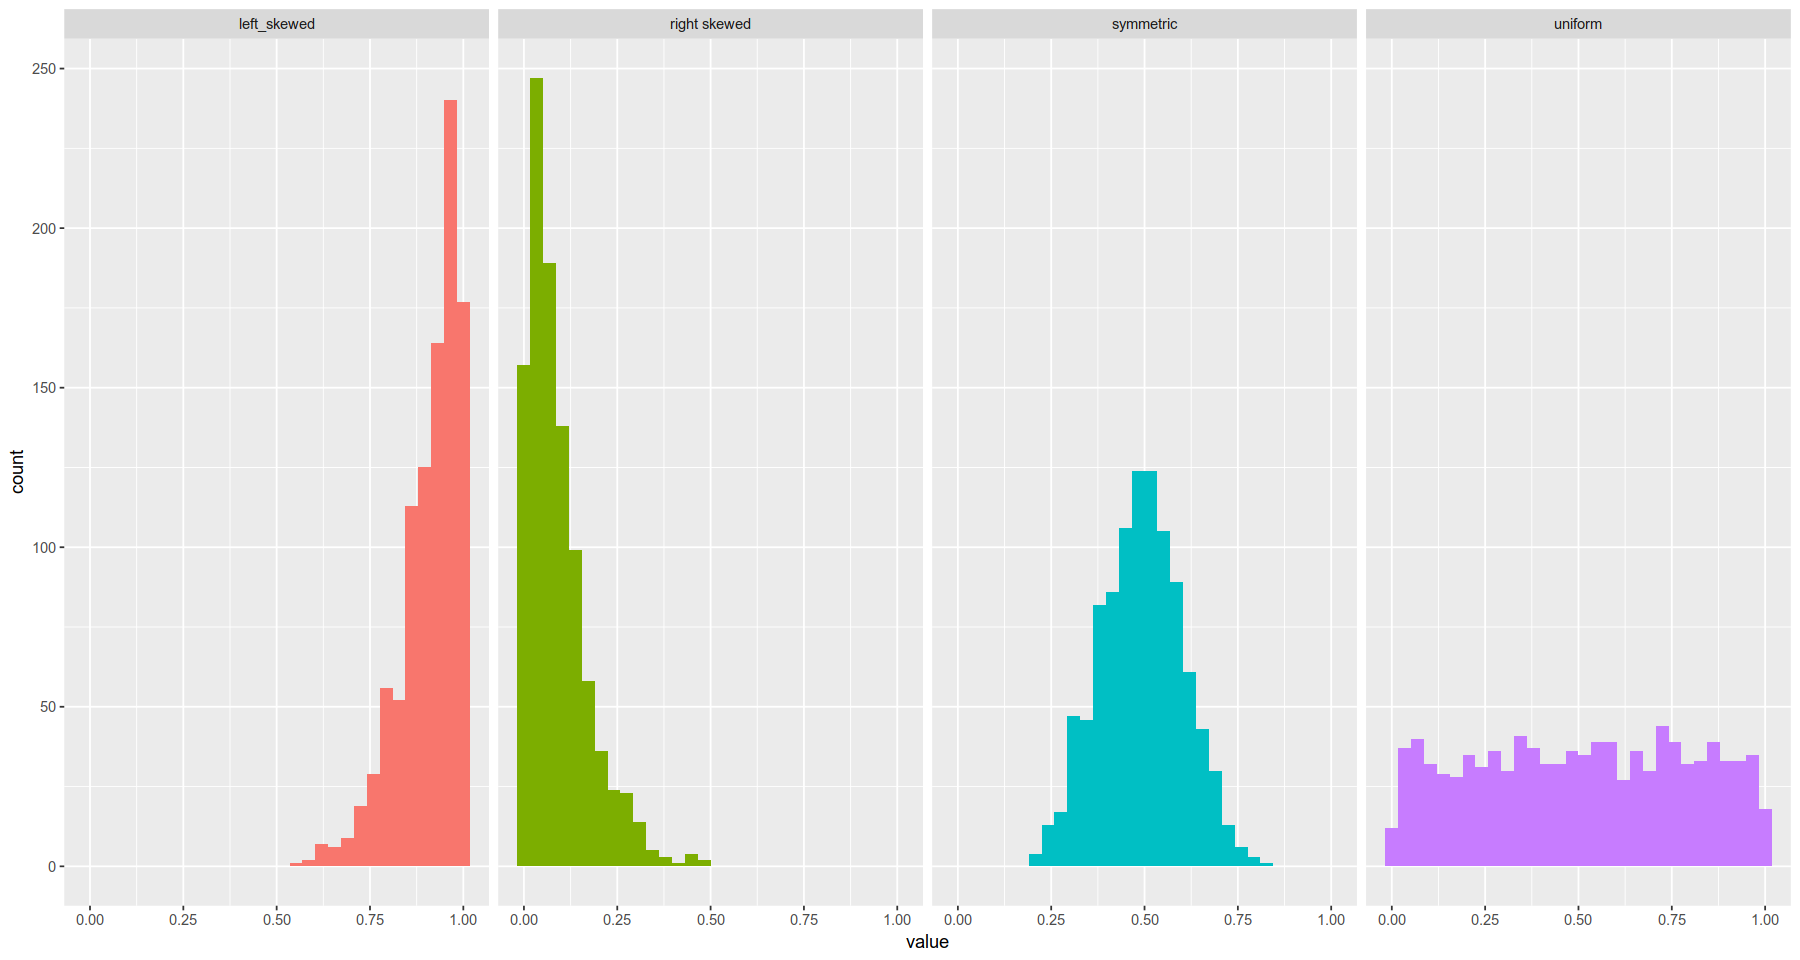

In [10]:
options(repr.plot.width=15, repr.plot.height=8)
ggplot(distributions, aes(x = value, fill = type)) + 
  facet_grid(~type) + 
  geom_histogram() + 
  theme(legend.position = "none")

You can even add a density curve to these histograms in order to better visualize the bell shape:

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


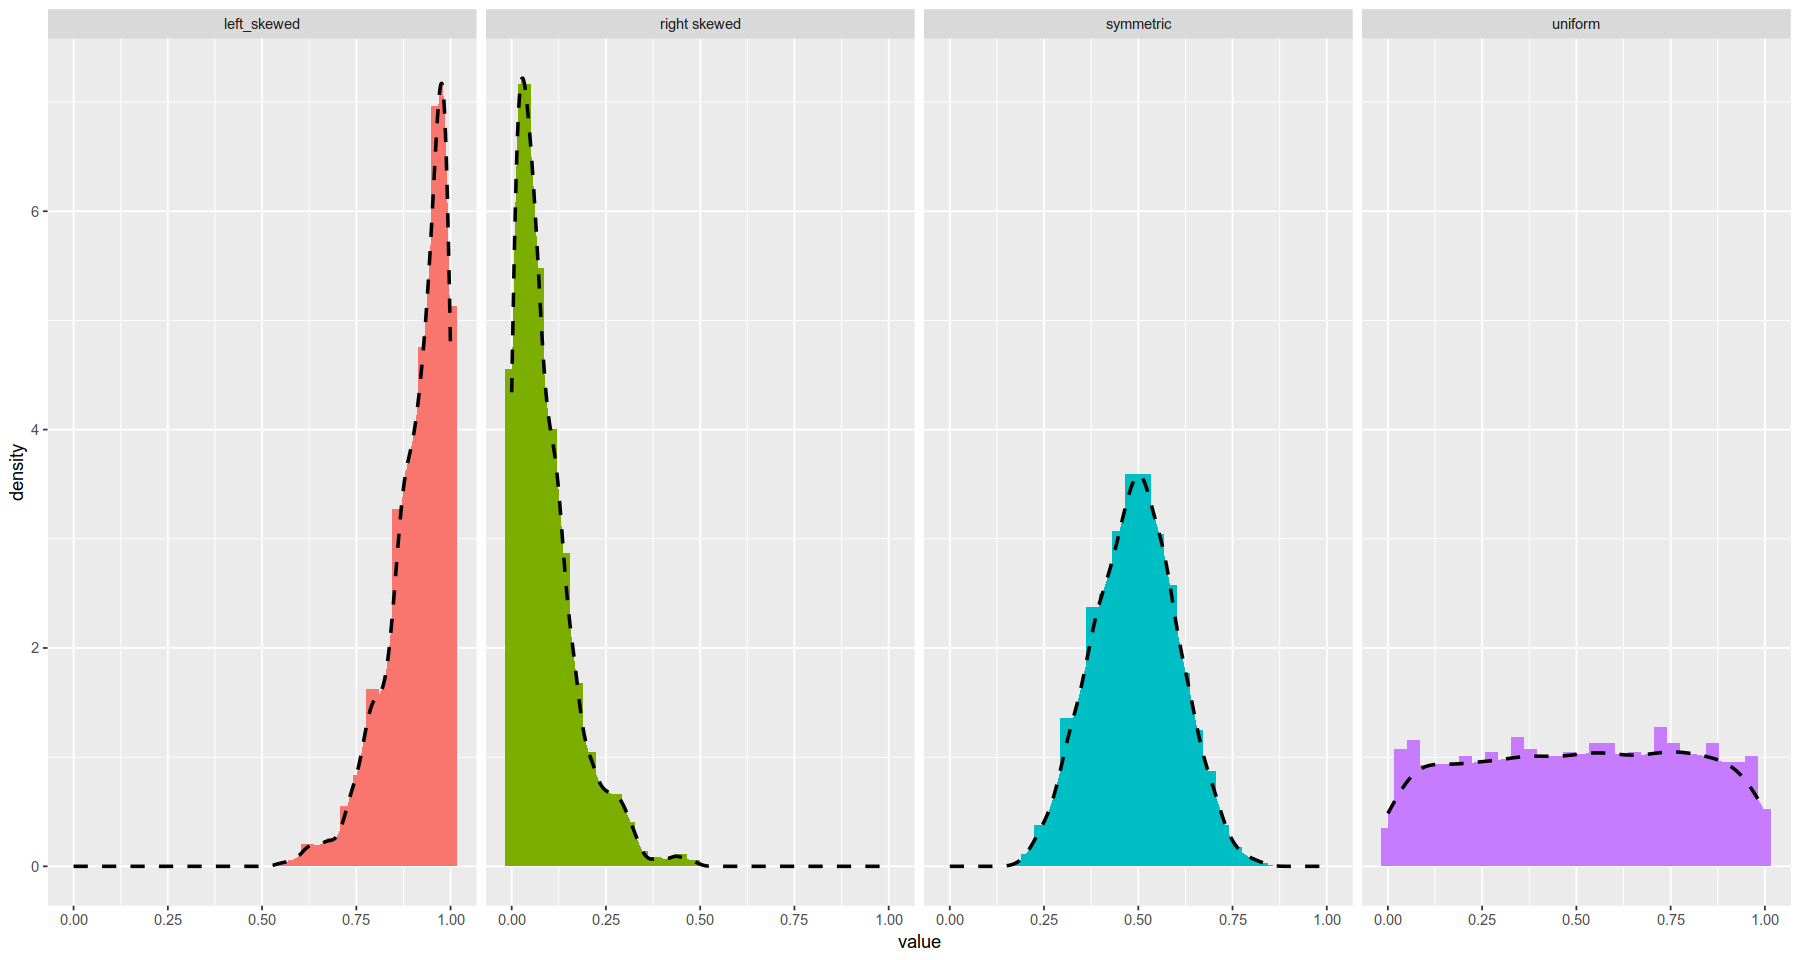

In [31]:
options(repr.plot.width=15, repr.plot.height=8)
ggplot(distributions, aes(x = value, fill = type)) + 
facet_grid(~type) + 
geom_histogram(aes(y = ..density..)) + 
geom_density(lwd = 1.,linetype = 2, colour = 'black') + 
  theme(legend.position = "none")  

As you can see, only the symmetric case appears to have a shape which looks like a gaussian.

## 2. Visually using Q-Q plots

A Q-Q plot is a graphical method for comparing the distribution of a dataset to a theoretical distribution (in this case, the normal distribution). To create a Q-Q plot of your data in R, you can use the functions `geom_qq` and `geom_qq_line` from **ggplot**. This will create a Q-Q plot with a diagonal line representing the expected values under the normal distribution. If your data are normally distributed, the points on the Q-Q plot should roughly follow the diagonal line. 

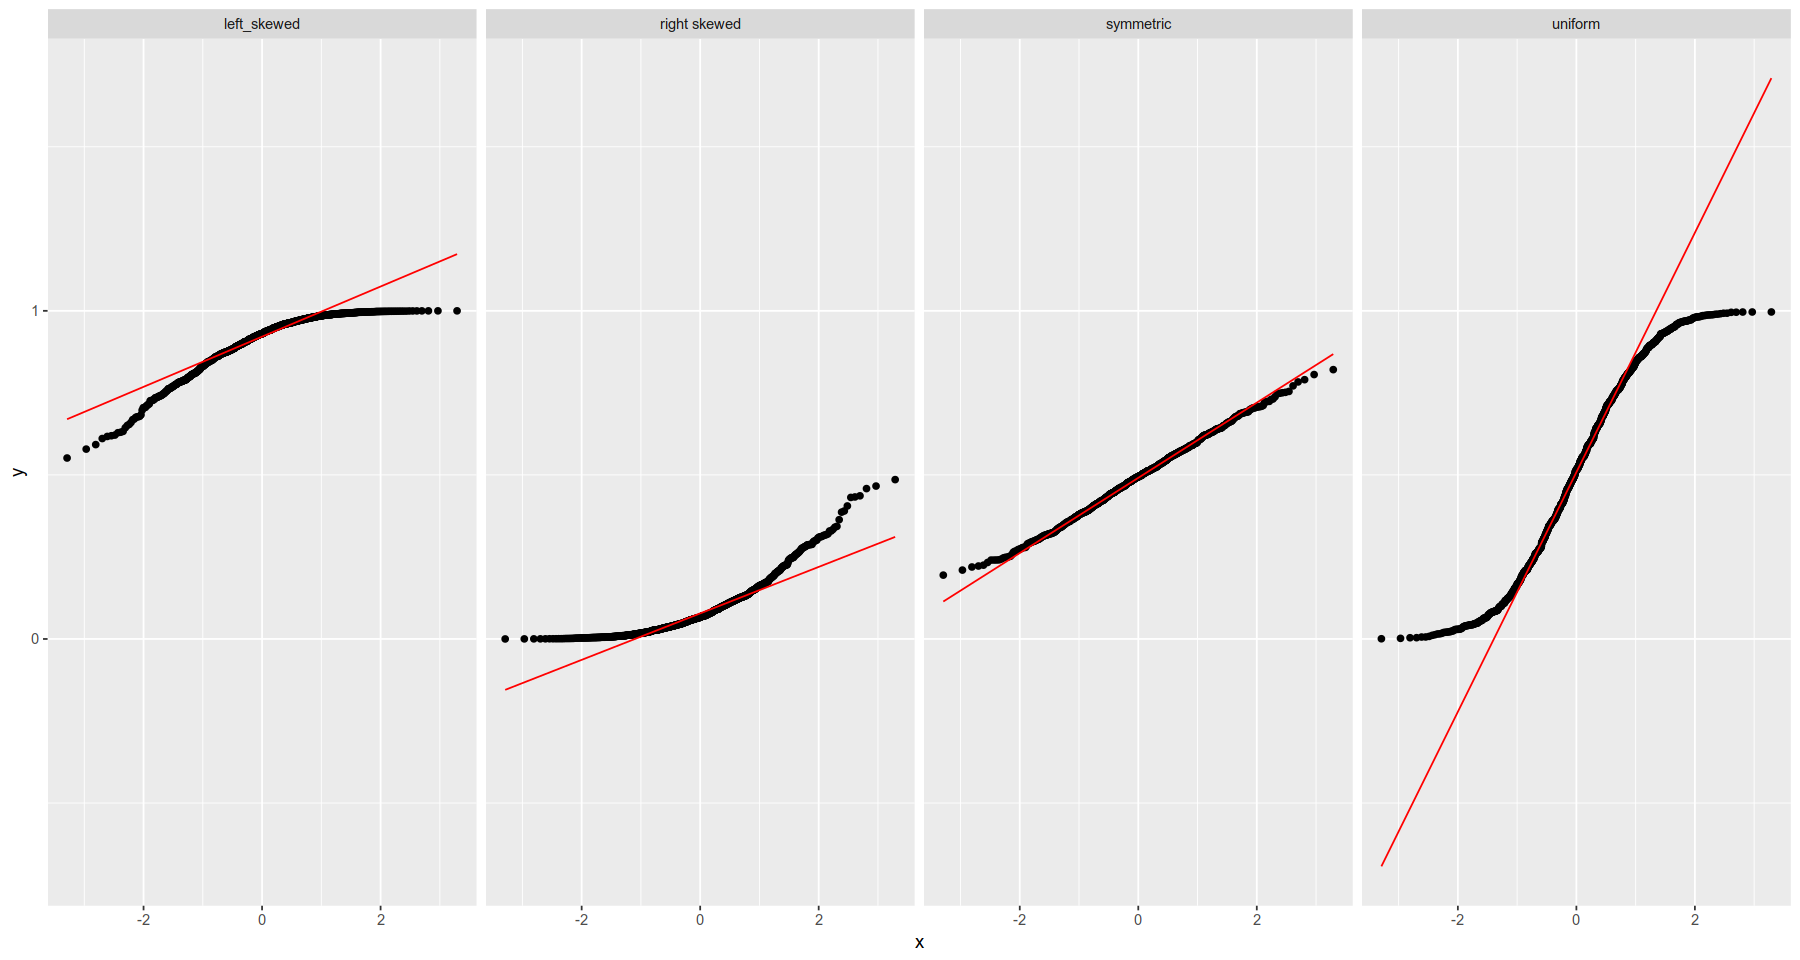

In [14]:
options(repr.plot.width=15, repr.plot.height=8)

ggplot(distributions, aes(sample = value, fill = type)) + 
  facet_grid(~type, scales = "free") + 
  geom_qq() + 
  geom_qq_line(color="red") +
  theme(legend.position = "none")

As you can see again, only points in the "symmetrical" case appear to roughly follow the diagonal line. This is another indication that only the symmetrical case distribution seem to follow a gaussian distribution.

## 3- USING DESCRIPTIVE STATISTICS

Additionally, we could try to support our visualizations by summarizing our distributions. If you remember from the second week of the course, skweness and kurtosis were two measures that characterized the shape of our distributions. Regarding normality, values of these measures different from zero may suggest a possible deviation from normality.

In order to get the skeweness and kurtosis, we could use the `describe` and `describeBy` functions in the **psych** library.

In [39]:
library(psych)
describeBy(x = distributions$value, group = distributions$type)


 Descriptive statistics by group 
group: left_skewed
   vars    n mean   sd median trimmed  mad  min max range  skew kurtosis se
X1    1 1000 0.91 0.08   0.93    0.92 0.07 0.55   1  0.45 -1.27     1.57  0
------------------------------------------------------------ 
group: right skewed
   vars    n mean   sd median trimmed  mad min  max range skew kurtosis se
X1    1 1000 0.09 0.08   0.07    0.08 0.07   0 0.49  0.49 1.54     2.79  0
------------------------------------------------------------ 
group: symmetric
   vars    n mean   sd median trimmed  mad  min  max range  skew kurtosis se
X1    1 1000 0.49 0.11   0.49    0.49 0.11 0.19 0.82  0.63 -0.01    -0.31  0
------------------------------------------------------------ 
group: uniform
   vars    n mean   sd median trimmed  mad min max range  skew kurtosis   se
X1    1 1000 0.51 0.29   0.51    0.51 0.36   0   1     1 -0.03    -1.19 0.01

Clearly, all the distributions but the symmetric one differ particularly from zero in skeness and/or kurtosis, suggesting that these do not follow a gaussian distribution. 

So what values should make us decide whether they follow a gaussian distribution or no? That's hard to say and it is quite subjective. In the end, descriptive statistics, like the visualizations, are just indications of normality.

## 4- Statistically: Shapiro-Wilk Test

The Shapiro-Wilk test is a statistical test for normality. To perform a Shapiro-Wilk test in R, you can use the built-in `shapiro.test` function. 

This function give you a test statistic and p-value. If the p-value is less than your chosen significance level or type I error $\alpha$, you can reject the null hypothesis of normality.

In [15]:
shapiro.test(symmetric$value)
shapiro.test(left_skewed$value)
shapiro.test(right_skewed$value)
shapiro.test(uniform$value)


	Shapiro-Wilk normality test

data:  symmetric$value
W = 0.99782, p-value = 0.2156



	Shapiro-Wilk normality test

data:  left_skewed$value
W = 0.8839, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  right_skewed$value
W = 0.86129, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  uniform$value
W = 0.95594, p-value < 2.2e-16


This will perform a Shapiro-Wilk test on your data and output the test statistic and p-value. If the p-value is less than your chosen significance level (usually 0.05), you can reject the null hypothesis of normality.

**N.B.** The Shapiro-Wilk test may not be trustworthy as the dataset gets larger, given that it becomes more sensitive to small deviations which leads to a greater probability of rejecting the null hypothesis (null hypothesis being the values come from a normal distribution).

In [12]:
set.seed(1234)
dat.norm<-rnorm(1000)
shapiro.test(dat.norm)

# Let's change just the value of the first element with one outlier
dat.norm[1]<-5
shapiro.test(dat.norm)


	Shapiro-Wilk normality test

data:  dat.norm
W = 0.99737, p-value = 0.1053



	Shapiro-Wilk normality test

data:  dat.norm
W = 0.99485, p-value = 0.00176


As a result, we should not rely on only one approach to assess our data. Rather, to come to the conclusion of whether the data meet the normality assumption or not, we should understand the distribution combining visualization, descriptive statistics, and formal testing procedures.

<div class="alert alert-info">  <b>Practice</b>: For the "sleep" data frame, which is part of R, show the Q-Q plot for the variable "extra" of the data frame and run a Shapiro-Wilk test. Could we say that this variable follows a gaussian distribution?

In [17]:
head(sleep)

,extra,group,ID
,<dbl>,<fct>,<fct>
1,0.7,1,1
2,-1.6,1,2
3,-0.2,1,3
4,-1.2,1,4
5,-0.1,1,5
6,3.4,1,6


# Checking the homogeneity of variance assumption

## 1- Visual Inspection

One way to check for homogeneity of variance is to create a boxplot of the dependent variable for each level of the independent variable. If the variances are approximately equal, the boxes on the boxplot should be roughly the same size for both groups. If the variances are different, the box for the group with the larger variance will be larger.

In [16]:
set.seed(1234)
sample1<-rbind(data.frame(value=rnorm(20), group='a'), data.frame(value=rnorm(20), group='b'))
sample2<-rbind(data.frame(value=rnorm(20), group='c'), data.frame(value=rnorm(20, sd = 2), group='d'))

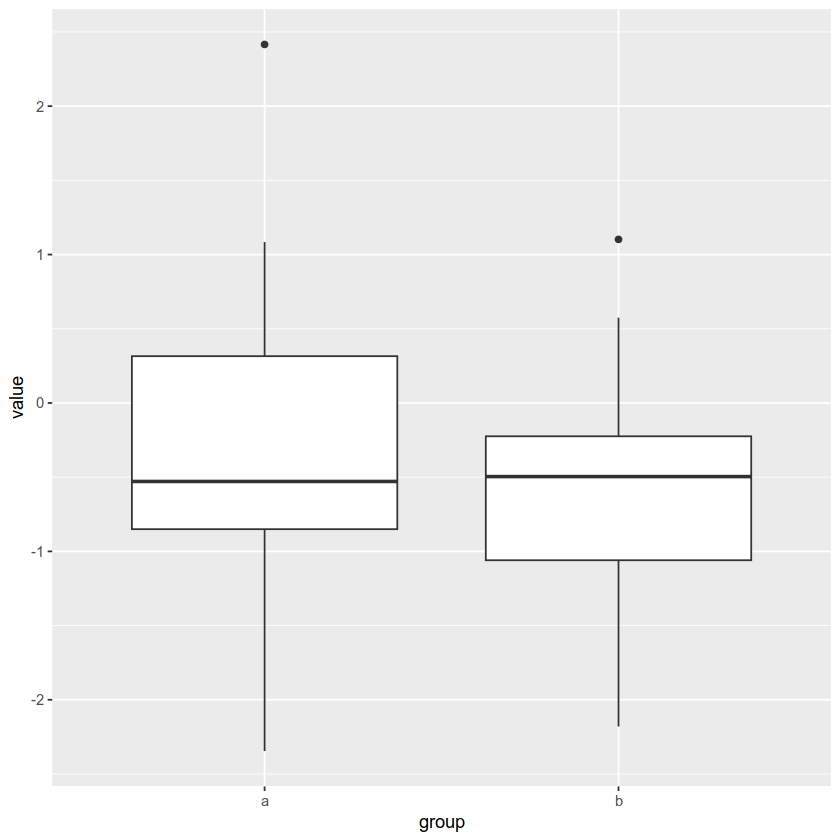

In [26]:
ggplot(data=sample1) + geom_boxplot(mapping = aes(x=group, y=value))

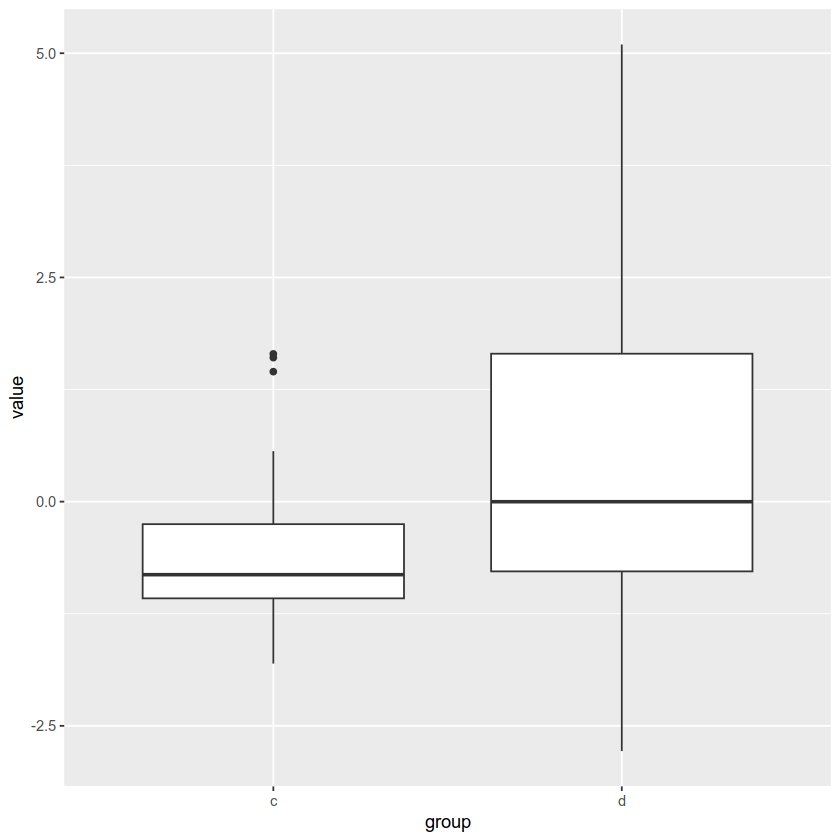

In [27]:
ggplot(data=sample2) + geom_boxplot(mapping = aes(x=group, y=value))

We can clearly see that, as expected, the variances across groups in sample1 are similar, whereas for the sample2 they are not. 

This is an example of how to visually inspect the variances across groups. That is why it is always a good idea to generate descriptive plots like boxplots or so!

It is important to note that visualizing variances offers clues rather than statistical validation of homogeneity (or heterogeneity). In order to obtain confirmation, we can carry out statistical tests

## 2- Statistically: F-Test (Only two groups)

The most straightforward method to compare the variances of TWO populations or groups is to use an F-test. This test involves calculating the F-statistic by taking the ratio of the variances of both groups. If the variances are similar, the resulting F-statistic should be close to 1, while different variances will produce an F-statistic different from 1. The degree of deviation from 1 will also affect the p-value, which can help determine whether or not to reject the assumption of equal variances. In R, you can perform an F-test using the `var.test` function.

In [30]:
?var.test

In [33]:
var.test(value~group, data = sample1)


	F test to compare two variances

data:  value by group
F = 1.6404, num df = 19, denom df = 19, p-value = 0.2894
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.6492986 4.1444431
sample estimates:
ratio of variances 
          1.640421 


In [34]:
var.test(value~group, data = sample2)


	F test to compare two variances

data:  value by group
F = 0.21707, num df = 19, denom df = 19, p-value = 0.001656
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.0859208 0.5484285
sample estimates:
ratio of variances 
         0.2170747 


As expected, only the test for sample2 yields a result that should make us reject the null hypothesis of equal variances in both groups.

## 2- Statistically: Bartlett’s Test (two or more groups)

Bartlett's test is a statistical test used to determine whether the variances of multiple groups or samples are equal or not.

The test works by comparing the variance within each group to the variance of the group means. If the variances are similar, then the group means should also be similar, and the test statistic should be small. If the variances are not similar, then the group means may be more spread out, and the test statistic will be larger.

In R, you can perform Bartlett's test using the `bartlett.test` built-in function, which returns the test statistic and p-value.

In [35]:
bartlett.test(value~group, data = sample1)


	Bartlett test of homogeneity of variances

data:  value by group
Bartlett's K-squared = 1.1224, df = 1, p-value = 0.2894


In [36]:
bartlett.test(value~group, data = sample2)


	Bartlett test of homogeneity of variances

data:  value by group
Bartlett's K-squared = 9.8881, df = 1, p-value = 0.001664


As expected again, only the test for sample2 yields a result that should make us reject the null hypothesis of equal variances in both groups.

To summarize, you can assess the assumption of homogeneity of variance by either visually inspecting the data or by conducting statistical tests like the F-test or Bartlett's test. It is advisable to use both methods to ensure the accuracy and reliability of your findings.